In [2]:
from __future__ import division
import pandas as pd
import numpy as np
from code.survey_processor_full import *
from code.fc_cluster import *


%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram



In [3]:
sv = survey('data/survey2/')
sv.num_processor()

In [4]:
df= sv.fin_data

In [5]:
df[sv.num_cols] = scale(df[sv.num_cols])

In [6]:
small = pd.read_pickle('data/df_id.pkl')

In [7]:
cols = small.columns

In [8]:
df_s = pd.DataFrame(np.column_stack((df[cols[:-1]], small.cluster)),columns=cols)

In [9]:
df_s = df_s.astype('float')

In [10]:
df_cs = df_s.groupby('cluster').agg(np.median)

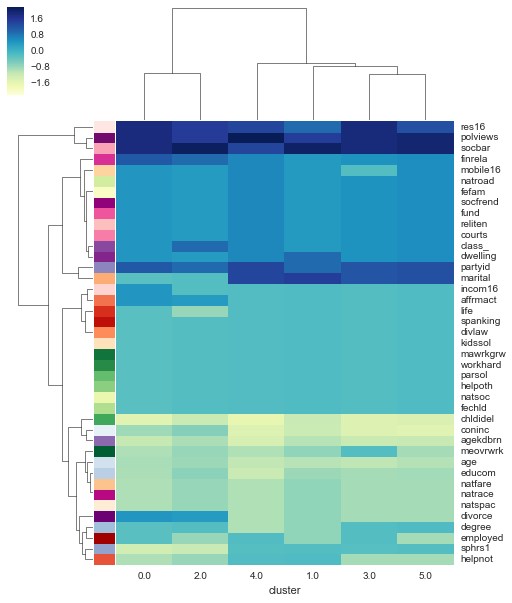

In [15]:
season_colors = (sns.color_palette("BuPu", 10) +
...                  sns.color_palette("RdPu", 10) +
...                  sns.color_palette("YlGn", 10) +
...                  sns.color_palette("OrRd", 11))
sns.clustermap(df_cs.T, row_colors= season_colors,z_score=1,cmap="YlGnBu",figsize=(8,10))

In [11]:
Y = pdist(df_s.values,metric='cosine')

In [12]:
sqr = squareform(Y)

In [13]:
tree = linkage(sqr,method = 'complete')

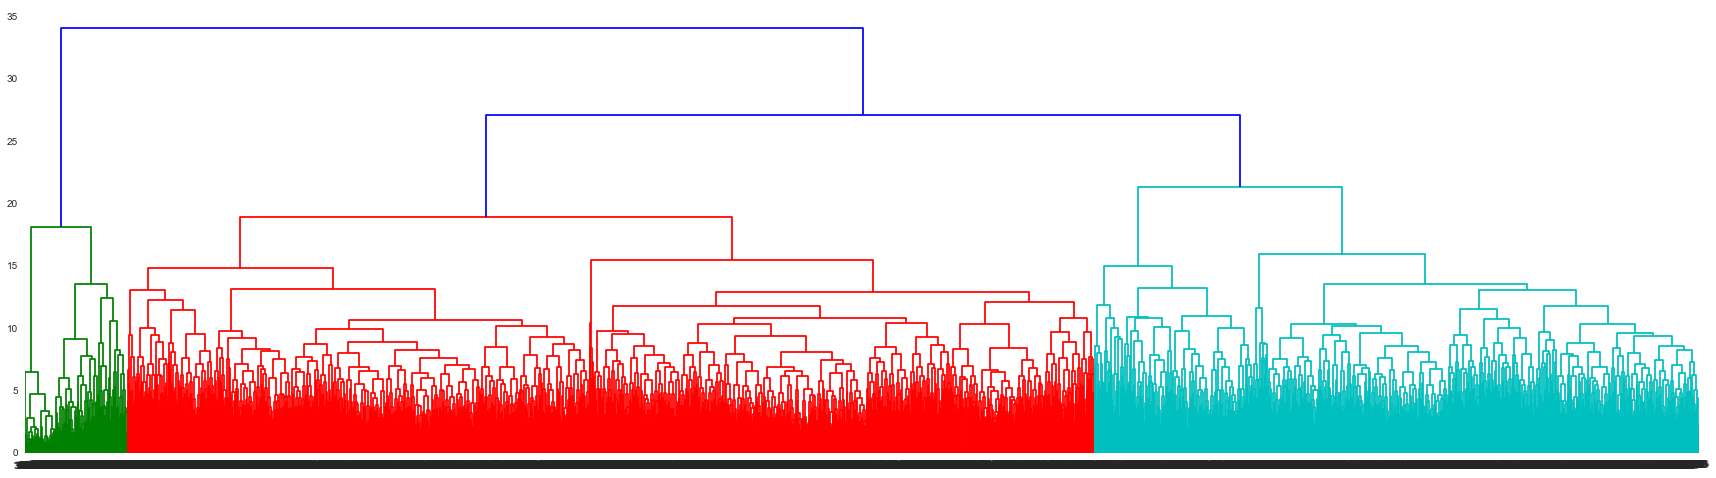

In [21]:
plt.figure(figsize=(30,8))
ax = dendrogram(tree)

plt.show()

In [15]:

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

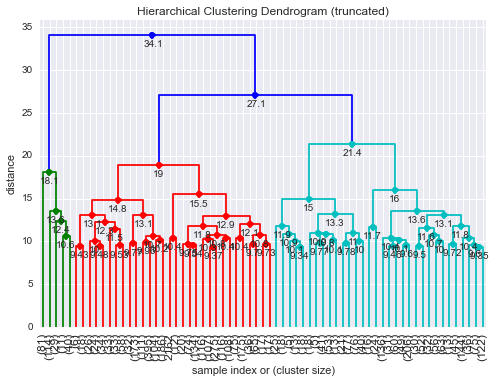

In [17]:
fancy_dendrogram(
    tree,
    truncate_mode='lastp',
    p=67,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=False,
    annotate_above=5,  # useful in small plots so annotations don't overlap

)
plt.show()